In [29]:
# importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import shutil

In [30]:
!unzip /content/train.zip
!unzip /content/valid.zip

Archive:  /content/train.zip
   creating: train/
  inflating: train/fdf9c9cc-a393-4d8d-b9b3-2f3cc922a3aa___YLCV_NREC 2063.JPG  
  inflating: train/fe40e21d-3391-4c08-9fce-c78de4b4c366___YLCV_GCREC 2264.JPG  
  inflating: train/fe746591-0f79-4175-99d2-ccd3672065a1___UF.GRC_YLCV_Lab 01717.JPG  
  inflating: train/feabce4c-9bb1-4fca-bcbf-368cacd40a68___PSU_CG 2115_newPixel25.JPG  
  inflating: train/feb114a3-a58f-47b6-b7e8-816ffb06bbc5___YLCV_GCREC 2338.JPG  
  inflating: train/ff2bb757-d8ac-43df-8161-4c2ef1806055___UF.GRC_YLCV_Lab 01758.JPG  
  inflating: train/ff46311d-9868-4313-8834-eaf2f3259b27___UF.GRC_YLCV_Lab 02625.JPG  
  inflating: train/ff8a2419-99e2-4bb8-ba94-691cb9773930___YLCV_GCREC 5393.JPG  
  inflating: train/ff8ddc21-4c78-48cf-b608-50d9e148667d___YLCV_GCREC 2402.JPG  
  inflating: train/ffdb355f-1de6-4217-8aac-6695ee621512___PSU_CG 2342_180deg.JPG  
Archive:  /content/valid.zip
   creating: valid/
  inflating: valid/f32568bd-2f68-4cbc-b083-4d9084858436___PSU_CG 2155_90deg

In [13]:
#Extracting the zip files
import zipfile

with zipfile.ZipFile('/content/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/')

with zipfile.ZipFile('/content/valid.zip', 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/')

In [14]:
# create folders
os.makedirs('/mnt/data/train/Diseased', exist_ok=True)
os.makedirs('/mnt/data/valid/Diseased', exist_ok=True)


In [15]:
#Move Images into Diseased Folder
train_path = '/mnt/data/train'
valid_path = '/mnt/data/valid'

for img in os.listdir(train_path):
    if img.endswith('.JPG'):
        shutil.move(
            os.path.join(train_path, img),
            os.path.join(train_path, 'Diseased', img)
        )

for img in os.listdir(valid_path):
    if img.endswith('.JPG'):
        shutil.move(
            os.path.join(valid_path, img),
            os.path.join(valid_path, 'Diseased', img)
        )

In [16]:
#Verify Structure
print(os.listdir('/mnt/data/train'))
print(os.listdir('/mnt/data/train/Diseased')[:5])

['Diseased']
['ff2bb757-d8ac-43df-8161-4c2ef1806055___UF.GRC_YLCV_Lab 01758.JPG', 'ffdb355f-1de6-4217-8aac-6695ee621512___PSU_CG 2342_180deg.JPG', 'feb114a3-a58f-47b6-b7e8-816ffb06bbc5___YLCV_GCREC 2338.JPG', 'fe746591-0f79-4175-99d2-ccd3672065a1___UF.GRC_YLCV_Lab 01717.JPG', 'fe40e21d-3391-4c08-9fce-c78de4b4c366___YLCV_GCREC 2264.JPG']


In [17]:
os.listdir('/mnt/data/')

['valid', 'train']

In [18]:
#Image Preprocessing & Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
#Load Dataset Using Directory Flow
train_data = train_datagen.flow_from_directory(
    '/mnt/data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

valid_data = valid_datagen.flow_from_directory(
    '/mnt/data/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 10 images belonging to 1 classes.
Found 12 images belonging to 1 classes.


In [20]:
train_data.class_indices

{'Diseased': 0}

In [21]:
# building cnn model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [22]:
#compiling model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
import os

print("Train folder contents:", os.listdir('/mnt/data/train'))
print("Valid folder contents:", os.listdir('/mnt/data/valid'))

Train folder contents: ['Diseased']
Valid folder contents: ['Diseased']


In [24]:
# training the cnn model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=valid_data
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9000 - loss: 0.6087 - val_accuracy: 1.0000 - val_loss: 7.2939e-13
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.6603e-09 - val_accuracy: 1.0000 - val_loss: 2.6426e-24
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.8747e-20 - val_accuracy: 1.0000 - val_loss: 7.2934e-36
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.0292e-17 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 6.5523e-27 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - 

In [25]:
#Evaluate Model Performance
loss, accuracy = model.evaluate(valid_data)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Accuracy: 100.00%


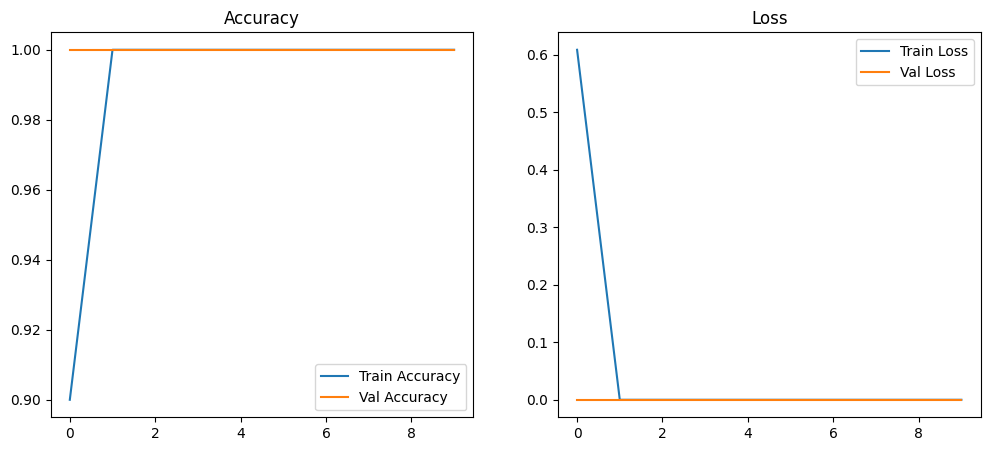

In [26]:
#Plot Accuracy & Loss Graphs
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

In [27]:
#save the model
model.save("plant_disease_cnn_model.h5")

In [31]:
#Test on a Single Image
img = image.load_img('/content/train/fdf9c9cc-a393-4d8d-b9b3-2f3cc922a3aa___YLCV_NREC 2063.JPG', target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Diseased Leaf")
else:
    print("Healthy Leaf")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Healthy Leaf
